Exploratory Data Analysis (EDA) 
- is used to analyze the datasets using pandas, numpy, matplotlib, etc., and dealing with missing values. By doing EDA, we summarize their main importance.

Feature Engineering 
 - is the process of extracting features from raw data with some domain knowledge.

Feature Selection 
- is where we select those features from the dataframe that will give a high impact on the estimator.

Model creation 
 - in this, we create a machine learning model using suitable algorithms, e.g., regressor or classifier.

Deployment 
 - where we deploy our ML model on the web.

In [2]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string 

In [3]:
sb.set()
pd.set_option('display.max_colwidth', None)

In [4]:
#download stopwords
#nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") #to reduce word to its stem > Lemmatization???
stopword = set(stopwords.words("english")) #to elimiate unimportand words, allowing applications to focus on the important word

## Helper functions

In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) #replace URL
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('\n', '', text) #remove line break
    text = re.sub('\w*\d\w*', '', text) #
    text = [word for word in text.split(' ') if word not in stopword]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

### SE2019 dataset

In [34]:
df = pd.read_csv("Dataset/SE2019/cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   9000 non-null   object
 1   text    9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [35]:
df['text'] = df['text'].apply(clean)
df.head()

,class,text
0,Hate,hurray save us mani way potus realdonaldtrump lockthemup buildthewal enddaca boycottnfl boycottnik
1,Hate,would young fight age men vast major one escap war amp cannot fight like women children elderlyit major refuge actual refuge econom migrant tri get europ
2,Hate,kamalaharri illeg dump kid border like road kill refus unit hope get amnesti free educ welfar illeg familesbelongtogeth countri taxpay dime scam nodaca noamnesti sendth
3,Non-Hate,ny time near white state pose array problem immigr
4,Non-Hate,orban brussel european leader ignor peopl want migrant


## DecisionTreeClassifier

In [8]:
#convert given text to a vector base
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

- The fit() method helps in fitting the training dataset into an estimator (ML algorithms).
- The transform() helps in transforming the data into a more suitable form for the model.
- The fit_transform() method combines the functionalities of both fit() and transform().

Train Set : (6300, 16324) (6300,)
Test Set  : (2700, 16324) (2700,)

Test Data Accuracy  :	 0.7537037037037037

              precision    recall  f1-score   support

        Hate       0.71      0.68      0.69      1106
    Non-Hate       0.78      0.81      0.79      1594

    accuracy                           0.75      2700
   macro avg       0.75      0.74      0.74      2700
weighted avg       0.75      0.75      0.75      2700


          Actual   Predict
count       2700      2700
unique         2         2
top     Non-Hate  Non-Hate
freq        1594      1639



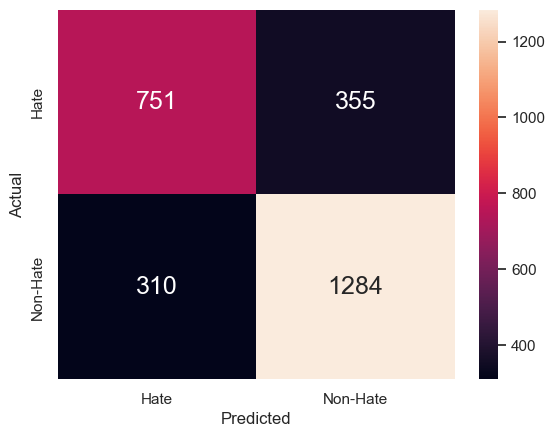

In [33]:
x = np.array(df["text"])
y = np.array(df["class"])

# Initialize 
cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=42)

print("Train Set :", x_train.shape, y_train.shape) 
print("Test Set  :", x_test.shape, y_test.shape) 
print()

# Train data
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)


# Predict data
print("Test Data Accuracy  :\t", dtc.score(x_test, y_test))
y_test_pred = dtc.predict(x_test)
print()


# Classification report
print(classification_report(y_test, y_test_pred, labels=["Hate","Non-Hate"]))
print()


# Heatmap
ax = plt.subplot()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=["Hate","Non-Hate"]), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(["Hate","Non-Hate"])
ax.yaxis.set_ticklabels(["Hate","Non-Hate"])

# Count
df1 = pd.DataFrame({'Actual':y_test, 'Predict':y_test_pred})
print(df1.describe())
print()

## BERT

- https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270
- https://www.youtube.com/watch?v=hOCDJyZ6quA


## SVM

## GPT